# Single pixel operations

Considering a grayscale image, single pixel operations/transforms (AKA intensity transforms) are functions that change the gray levels (values of pixels from 0 to 255) of the image. Elements involved:

* Function $I(x,y)$ representing the original image $(r=I(x_i,y_i)$ is the $i$-th pixel)
* Function $T(\cdot)$ representing the gray level change ($s=T(r)$ output level of $i$-th pixel)

The following are commonly used intensity transformations:

* Negative
* Logarithm
* Gamma
* Histogram equalization

<center>
<figure>
<img src="img/spo_1.png" style="height: 400; width: 400px;"/>
    <figcaption></figcaption>
</figure>
</center>

In [3]:
# Libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Image dimenions: (432, 512)


(-0.5, 511.5, 431.5, -0.5)

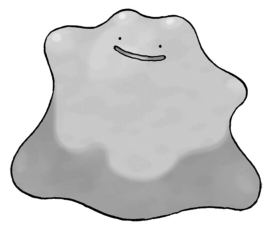

In [4]:
img = cv2.imread('ditto_gray.jpeg',0)
print(f'Image dimenions: {img.shape}')
plt.imshow(img, cmap = 'gray')
plt.axis('off')

## Negative transformations
Switch dark and light. The negative transformation can be described by the expression

$$s = (L-1)-r, \;\; L = 256$$

where $r$ is the initial intensity level and $s$ is the final intensity level of a pixel.

(-0.5, 511.5, 431.5, -0.5)

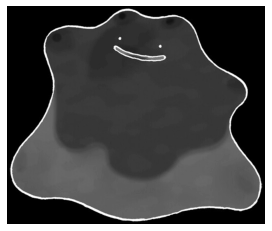

In [5]:
# apply the negative transformation
L = 256
neg_img = (L-1)-img
plt.imshow(neg_img, cmap = 'gray')
plt.axis('off')

## Log transform
Practically, log transformation maps a narrow range of low-intensity input values to a wide range of output values. Mathematically, log transformations can be expressed as

$$s=c\cdot log(1+r),\;\;c=\frac{L-1}{logL}$$

where $c$ is a scaling constant. The scaling operation is done to ensure that the final pixel value does not exceed (L-1), or 255.

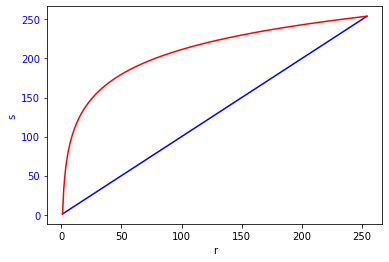

In [6]:
fig, ax = plt.subplots()
x = list(range(1,255))
y1 = x
y2 = np.log(x)
# all possible value of original image [0,255]
ax.plot(x, y1, color="blue")
ax.set_xlabel('r')
ax.set_ylabel('s', color="blue")       
ax.tick_params(axis='y', colors="blue")  
# log transformation 
ax2 = ax.twinx()
ax2.plot(x, y2, color="red") 
plt.axis('off')
# show 
plt.show()

(-0.5, 829.5, 835.5, -0.5)

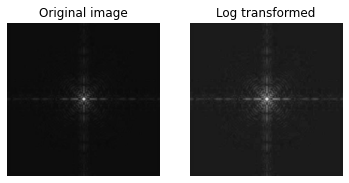

In [7]:
# original image
img = cv2.imread('img/log.png',0)
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.axis('off')
# Apply log transform.
L = 256
c = (L-1)/(np.log(L))
img_log = c * np.log(1 + img)
plt.subplot(122)
plt.imshow(img_log, cmap = 'gray')
plt.title('Log transformed')
plt.axis('off')

## Gamma transform 

Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion.

<center>
<figure>
<img src="img/gamma_1.png" style="height: 400; width: 400px;"/>
    <figcaption></figcaption>
</figure>
</center>

Gamma transformations can be mathematically expressed as:

$$s = cr^\gamma $$
$$c = (L-1)^{1-\gamma} $$

<center>
<figure>
<img src="img/gamma_2.png" style="height: 400; width: 400px;"/>
    <figcaption></figcaption>
</figure>
</center>

(-0.5, 511.5, 431.5, -0.5)

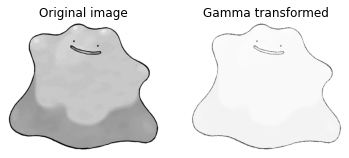

In [8]:
# original image 
img = cv2.imread('ditto_gray.jpeg',0)
# gamma transformation 
L = 256
gamma = 0.10
c = (L-1) ** (1-gamma)
img_gamma = c * (img ** gamma)
# plot
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_gamma, cmap = 'gray')
plt.title('Gamma transformed')
plt.axis('off')

## Histogram Equalization

**What is an Image Histogram?**
* It is a graphical representation of the intensity distribution of an image
* It quantifies the number of pixels for each intensity value considered.

<center>
<figure>
<img src="img/heq_1.png" style="height: 400; width: 400px;"/>
    <figcaption></figcaption>
</figure>
</center>

### Histogram of a grayscale image
OpenCV provides us with the ***cv2.calcHist*** function to calculate the image histograms.
Let's familiarize with the function and its parameters:

` cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])` 

* **images**: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
* **channels**: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* **mask**: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* **histSize**: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* **ranges**: this is our RANGE. Normally, it is [0,256].

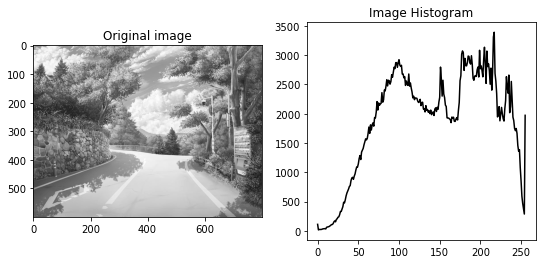

In [9]:
# original image 
img = cv2.imread('img/landscape.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.subplot(122)
plt.plot(hist, color='black')
plt.title('Image Histogram')
plt.show()

### Histogram Calculation in Numpy

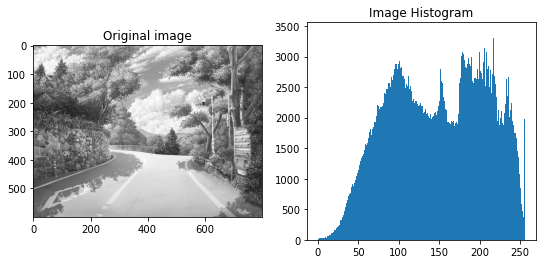

In [10]:
# original image 
img = cv2.imread('img/landscape.jpg',0)
# using numpy ravel 
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.subplot(122)
plt.hist(img.ravel(),256,[0,256])
plt.title('Image Histogram')
plt.show()

### Application of Mask

(0.0, 256.0)

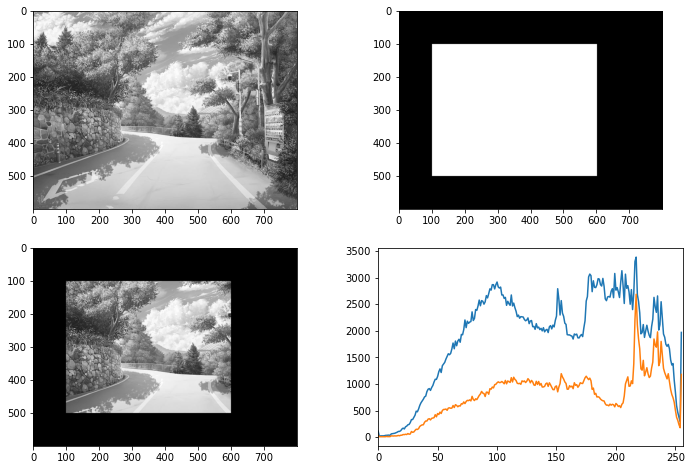

In [11]:
img = cv2.imread('img/landscape.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:500, 100:600] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
# plot
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

In the histogram plot, blue line shows histogram of full image while orange line shows histogram of masked region.

### What is Histogram Equalization?

* It is a method that improves the contrast in an image, in order to stretch out the intensity range
* Used for: 
    * Evaluating image statistics
    * Compression
    * Segmentation
    * Image enhancement
    
Histogram of the grayscale image can be treated as a probabilistic density function (PDF):

$$p(r_k) = \frac{n_k}{MN}$$

#### PDF/CDF recall

* Cumulative Distribution Function (CDF)
    
    $$ F_x(x) = P(X \leq x)$$

* Probability Density Function (PDF)

    $$f_x(x) = \frac{d}{d_x}F_x(x)$$
    
    $$F_x(x) = \int_{-\infty}^{x} f_x(t) dt $$
    
#### Equalization function

Can we modify the histogram? We can equalize the histogram (flattens the histogram) ***based on an equalization function***.

* Introduce $T(r)$ to equalize the histogram
* $T(r)$ shall be monotonically non-decreasing (or monotonically increasing if inverse function is needed)

$$ 0 \leq T(r) \leq L-1 $$ 

$$ 0 \leq r \leq L-1$$ 

where $T(r)$ continuous and differentiable. The CDF of the $p(r)$ is the $T(r)$ transformation used to equalize the histogram:

$$ s = T(r) = (L-1)\int_{-\infty}^r p_r(w)dw,\;\;L=256 $$

$$ s_k = T(r_k) = (L-1)\sum_{j=0}^k p_r(r_j)$$


<center>
<figure>
<img src="img/3bit.png" style="height: 800; width: 800px;"/>
    <figcaption>Equalization: a 3-bit example</figcaption>
</figure>
</center>

The output is not perfectly flat caused by the discrete nature of data. Finally, we use a simple remapping procedure to obtain the intensity values of the equalized image:

$$equilized(x_i,y_i) = T((x_i,y_i))$$.

Following the previous example in a hypothetical 3-bit image:

* all point $(x_i,y_i)$ with value 0 is mapped to value 1
* all point $(x_i,y_i)$ with value 1 is mapped to value 3
* all point $(x_i,y_i)$ with value 2 is mapped to value 5
* $\dots$

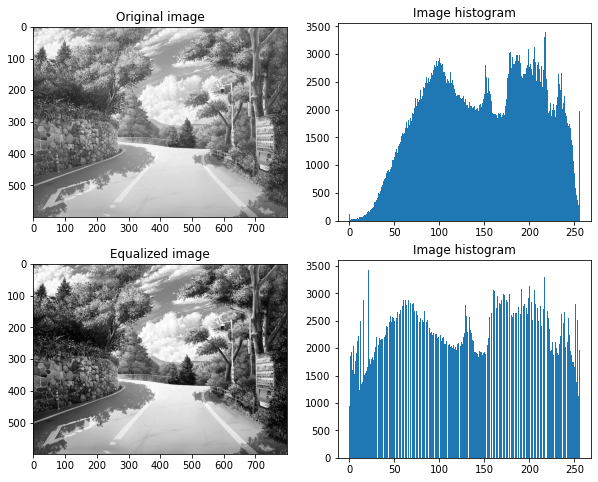

In [27]:
# original image 
img = cv2.imread('img/landscape.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.subplot(222)
plt.hist(img.ravel(),256,[0,256])
plt.title('Image histogram')
# equalize 
img_equalized = cv2.equalizeHist(img)
plt.subplot(223)
plt.imshow(img_equalized, cmap = 'gray')
plt.title('Equalized image')
plt.subplot(224)
plt.hist(img_equalized.ravel(),256,[0,256])
plt.title('Image histogram')
plt.show()

### Histogram equalization on RGB image

For a greyscale image, each pixel is represented by the intensity value (brightness); that is why we can feed the pixel values directly to the HE (histogram equalization) function. However, that is not how it works for an RGB-formatted color image. Each channel of the R, G, and B represents the intensity of the related color, not the intensity/brightness of the image as a whole. And so, running HE on these color channels is NOT the proper way.

We should first separate the brightness of the image from the color and then run HE on the brightness. Now, there are already standardized colorspaces that encode brightness and color separately, like- YCbCr, HSV, etc.; so, we can use them here for separating and then re-merging the brightness. The proper way:

* Convert the colorspace from RGB to YCbCr 
* Run HE on the Y channel (this channel represents brightness)
* Convert back the colorspace to RGB

(-0.5, 799.5, 599.5, -0.5)

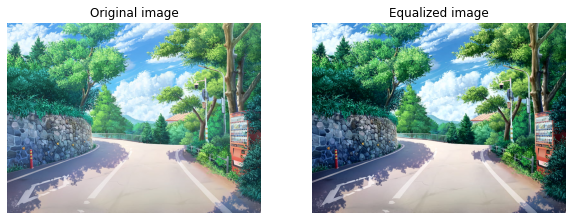

In [36]:
# original image 
img = cv2.imread('img/landscape.jpg',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original image')
plt.axis('off')
# convert from RGB color-space to YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# equalize the histogram of the Y channel
img_ycrcb[:, :, 0] = cv2.equalizeHist(img_ycrcb[:, :, 0])
# convert back to RGB color-space from YCrCb
img_equalized = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2RGB)
plt.subplot(122)
plt.imshow(img_equalized)
plt.title('Equalized image')
plt.axis('off')

## References

* [Computer Vision Course by Prof. Ghidoni Stefano (Unipd)](http://www.dei.unipd.it/~ghidoni/)
* [OpeCV Histograms](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)
* [OpenCV Histogram Equalization
](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)